<a href="https://colab.research.google.com/github/LarryB38/GIT-Research/blob/Heart-Disease-Predictions/Larry_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#use the updated dataset
#tell Ryan and Collin also to change to new dataset

# 0-4: treat 1-4 as "1"
#change the y list manually
#send article later?

# Note: when using assigned discrete labels it's a classification, so use a Classification performance metric
# accuracy is a good classification metric

#Dr. Wang likes matthews correlation coefficient (good for imbalanced classes)

In [ ]:
# 3 values to calculate:
"""
-accuracy
-matthew correlation coefficient
-AUROC (area under receiving operating curve)
"""

'\n-accuracy\n-matthew correlation coefficient\n-AUROC (area under receiving operating curve)\n'

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from statistics import mean
from statistics import stdev
from sklearn.metrics import r2_score 
from google.colab import drive
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
drive.mount('/content/drive')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
#load CSV file
df=pd.read_csv('/content/drive/My Drive/Correct_Dataset.csv')
x_input=df.copy()
x_input_chol=df.copy()
y_vals=df['Target']

df.head()
#this shows basic stats of the dataframe
#df.describe()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
df

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [ ]:
# convert 1-4 targets into just 1's
target_binarized_chol=[]
for i in y_vals:
  if i==0:
    target_binarized_chol.append(0)
  else:
    target_binarized_chol.append(1)



target_binarized_chol=np.array(target_binarized_chol)
target_binarized_chol=target_binarized_chol.reshape(-1,1)
#print(target_binarized_chol)

##Histogram of Cholesterol for No Disease & Yes Disease


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, '\nCholesterol values with (red) & without (green) heart disease')]

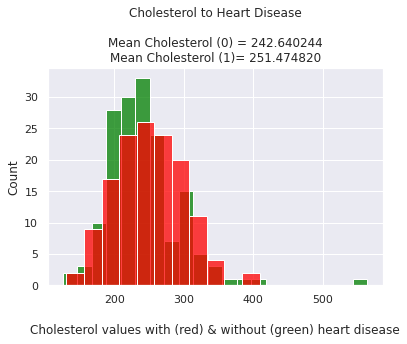

In [ ]:
#histogram of cholesterol values with (green) & without (red) heart disease
# x-axis cholesterol
# do it here^^
#Hypothesis: mean chol values in disease vs no-disease should be different

target_val=df['Target']
zeros_list=[]
ones_list=[]
index=0
for i in  target_val:
  if i==0:
    zeros_list.append(index)
  else:
    ones_list.append(index)
  index +=1;

# make dataframe of only target value 0
zeros_df=df.drop(labels=ones_list,axis=0)

# make dataframe of only target value 1,2,3
ones_df=df.drop(labels=zeros_list,axis=0)


# plot the histogram(s)
sns.set_theme(); np.random.seed(0)
ax = sns.histplot(zeros_df['Colestrol'],color='green')
ax = sns.histplot(ones_df['Colestrol'],color='red')

ax.set(title='Cholesterol to Heart Disease\n\nMean Cholesterol (0) = 242.640244\nMean Cholesterol (1)= 251.474820')
ax.set(xlabel="\nCholesterol values with (red) & without (green) heart disease", ylabel = "Count")

# Average Cholesterol is slightly higher for folks with heart disease
# Hypothesis is true.


In [ ]:
print(ones_list)

[1, 2, 6, 8, 9, 12, 16, 22, 23, 24, 29, 31, 32, 36, 37, 38, 40, 44, 45, 47, 52, 54, 55, 56, 57, 60, 62, 64, 65, 66, 68, 69, 71, 72, 73, 74, 76, 79, 83, 91, 95, 96, 97, 104, 106, 107, 108, 109, 110, 111, 113, 114, 118, 119, 120, 121, 123, 124, 126, 127, 136, 137, 138, 141, 143, 145, 146, 153, 154, 155, 156, 157, 158, 161, 168, 170, 172, 174, 175, 177, 180, 181, 184, 187, 188, 189, 191, 192, 193, 195, 199, 205, 206, 207, 209, 211, 213, 214, 223, 224, 228, 229, 231, 232, 235, 236, 237, 243, 245, 246, 247, 248, 251, 259, 261, 264, 265, 266, 267, 268, 270, 272, 274, 278, 280, 282, 284, 285, 286, 290, 292, 293, 294, 296, 297, 298, 299, 300, 301]


In [ ]:
#zeros_df.describe()
ones_df.describe()

,Unnamed: 0,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Target
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,155.633094,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,2.043165
std,89.120188,7.938416,0.385457,0.823680,18.769019,49.486835,0.366317,0.977486,22.593233,0.499609,1.302580,0.563736,1.013464
min,1.000000,35.000000,0.000000,1.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,1.000000
25%,73.500000,52.000000,1.000000,4.000000,120.000000,217.500000,0.000000,0.000000,125.000000,0.000000,0.550000,1.000000,1.000000
50%,155.000000,58.000000,1.000000,4.000000,130.000000,249.000000,0.000000,2.000000,142.000000,1.000000,1.400000,2.000000,2.000000
75%,233.500000,62.000000,1.000000,4.000000,145.000000,283.500000,0.000000,2.000000,156.500000,1.000000,2.500000,2.000000,3.000000
max,301.000000,77.000000,1.000000,4.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,4.000000


##Model Using only Cholesterol

In [ ]:
# based only off of cholesterol

x_chol=np.array(df['Colestrol'])
x_chol=x_chol.reshape(-1,1)

#fit model (only Cholesterol)
reg_1chol=LogisticRegression().fit(x_chol,target_binarized_chol)
y_predictions_1factor=reg_1chol.predict(x_chol)

#R^2 value (only cholesterol)
rsquared_chol=reg_1chol.score(x_chol,target_binarized_chol)
print(reg_1chol.score(x_chol,target_binarized_chol))

0.5445544554455446


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(x_chol.shape)
print(target_binarized_chol.shape)

(303, 1)
(303, 1)


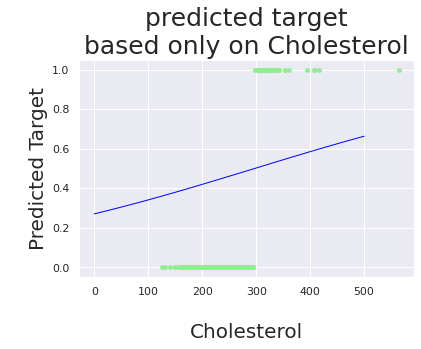

In [ ]:
#plot target predictions only off cholesterol (0 or 1)

# y (predicted target) vs. x (cholesterol)
plt.scatter(x_chol,y_predictions_1factor, s=14,color='lightgreen')

#plot true cholesterol values
#plt.scatter(x_chol,y_vals, s=14,color='red')

plt.title('predicted target\nbased only on Cholesterol',fontsize=25) #plot title

#sort x_chol first
# generate 50 samples?
x_sortedSample=np.linspace(0,500,num=50)
x_vals_sorted=x_sortedSample.reshape(-1,1)


#plot curve of best fit
plt.plot(x_vals_sorted,reg_1chol.predict_proba(x_vals_sorted)[:,1],color='blue',linewidth=1)
#sort x_chol

#or make my own list cholesterol range (5,10,15,20...)


plt.xlabel('\nCholesterol',fontsize=20)  # x-axis name
plt.ylabel('\nPredicted Target',fontsize=20)  # y-axis name

# put R^2 on the plot
#plt.annotate(("r^2 = {:.4f}".format(r2_score(y_vals, y_predictions_1factor))), (12, 90))

plt.show()

In [ ]:
# print parameters of this logistic model here:


In [ ]:
# calculate these 3: accuracy, matthew's coefficient, AUROC

# accuracy
targets=['0=No Disease', '1=Disease']
print(classification_report(target_binarized_chol,y_predictions_1factor,target_names=targets))
# ^^ macro avg? weighted avg?


              precision    recall  f1-score   support

0=No Disease       0.55      0.85      0.67       164
   1=Disease       0.51      0.18      0.27       139

    accuracy                           0.54       303
   macro avg       0.53      0.52      0.47       303
weighted avg       0.53      0.54      0.48       303



In [ ]:
# matthew's correlation coefficient
print("Matthew's coefficient (only cholesterol) is: ", matthews_corrcoef(target_binarized_chol,y_predictions_1factor))

# AUROC
#print("\nAUROC (true vs. predicted) is: ", roc_auc_score(target_binarized_chol,y_predictions_1factor)) << incorrect

# is it true y vs. confidence score?
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html 
# it say: y_true vs. y_score
print("\nAUROC (true vs. probability is) : ",roc_auc_score(target_binarized_chol,reg_1chol.predict_proba(x_chol)[:,1]))
#same as decision_function
print("\nAUROC (true vs. confidence score) is: ", roc_auc_score(target_binarized_chol,reg_1chol.decision_function(x_chol)))

Matthew's coefficient (only cholesterol) is:  0.045357502805109716

AUROC (true vs. probability is) :  0.5701658185646605

AUROC (true vs. confidence score) is:  0.5701658185646605


In [ ]:
#plot the Receiver Operator Curve

In [ ]:
# plot statistics
#xChol=sm.add_constant(x_chol)
#results_1chol=sm.Logit(y_predictions_1factor,xChol).fit()

#very low coefficient
print(reg_1chol.coef_)
print(reg_1chol.intercept_)

[[0.00333884]]
[-0.98981774]


In [ ]:
# accuracy & f1-score manually:

#accuracy
print("accuracy: ",accuracy_score(target_binarized_chol,y_predictions_1factor))

#f1 scores
print("f1 score (macro): ",f1_score(target_binarized_chol,y_predictions_1factor,average='macro'))
print("f1 score (weighted): ",f1_score(target_binarized_chol,y_predictions_1factor,average='weighted'))

accuracy:  0.5445544554455446
f1 score (macro):  0.4679069530693271
f1 score (weighted):  0.48456945358589615


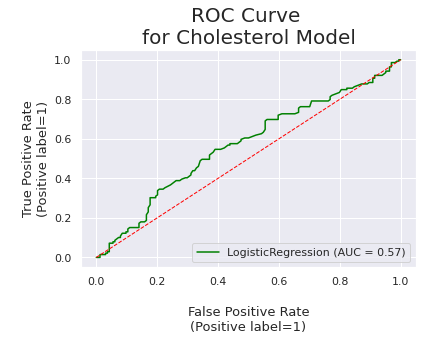

In [ ]:
# generate the receiver-operating curve for cholesterol model
metrics.plot_roc_curve(reg_1chol, x_chol, target_binarized_chol,color='green')  
plt.title('ROC Curve \nfor Cholesterol Model',fontsize=20)
plt.xlabel('\nFalse Positive Rate\n(Positive label=1)',fontsize=13)  
plt.ylabel('\nTrue Positive Rate\n(Positive label=1)',fontsize=13)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='red', label='Random')
plt.show()


In [ ]:
# manually calculate sensitivity & specificity

true_y_list=[] #hold the true 0 or 1
pred_y_list=[] #hold the predicted 0 or 1

true_positives=0
false_positives=0
false_negatives=0
true_negatives=0

y_predictions_1factor=y_predictions_1factor.reshape(-1,1)


for i in y_vals:
  if i==0:
    true_y_list.append(0)
  else:
    true_y_list.append(1)

for i in y_predictions_1factor:
  if i==0:
    pred_y_list.append(0)
  else:
    pred_y_list.append(1)

for index in range(len(pred_y_list)):
  if true_y_list[index]==1 and pred_y_list[index]==1:
    # true positive (both true and predicted are 1)
    true_positives +=1
  elif true_y_list[index]==0 and pred_y_list[index]==1:
    # false positive (true is 0 but pred is 1)
    false_positives +=1
  elif true_y_list[index]==1 and pred_y_list[index]==0:
    # false negative (true is 1 but pred is 0)
    false_negatives +=1
  elif true_y_list[index]==0 and pred_y_list[index]==0:
    # true negative (both true and pred are 0)
    true_negatives +=1

print("total values:",len(true_y_list),'\n')
print('true positives:',true_positives)
print('false positives:',false_positives)
print('false negatives:',false_negatives)
print('true negatives:',true_negatives)


total values: 303 

true positives: 25
false positives: 24
false negatives: 114
true negatives: 140


In [ ]:
# Handmade Confusion Matrix:
# https://docs.google.com/drawings/d/e/2PACX-1vTk7WTsgaRZkyEYizR5OJ5Ak6j84Hh6VxPjFT0WzdIHi03MIpWUp9vlUTv8oWTFg-atkTxFE2wTlfmR/pub?w=960&h=720

##Model Using all variables

In [ ]:
## indicate which input cols can use one hot encoding
input_cols_oneHotEncoding = []
input_cols_others = []
x_post=pd.DataFrame()

## Data analysis to see which inputs can use one hot encoding
for i in df:
  if(i == 'Target'):
    pass;
  elif(len(df[i].unique()) < 10): # category has less than 10 distinct values
    print('Unique values in {} are: {}'.format(i, df[i].unique()))

    # append the column name
    input_cols_oneHotEncoding.append(i)
  else: 
    # append the column name
    input_cols_others.append(i)

Unique values in Sex are: [1 0]
Unique values in Chest_Pain are: [1 4 3 2]
Unique values in Fasting_Blood_Sugar are: [1 0]
Unique values in Rest_ECG are: [2 0 1]
Unique values in Exercised_Induced_Angina are: [0 1]
Unique values in Slope are: [3 2 1]
Unique values in Major_Vessels are: ['0' '3' '2' '1' '?']
Unique values in Thalessemia are: ['6' '3' '7' '?']


In [ ]:


## indicates string cols ##
strClasses = input_cols_oneHotEncoding

for i in strClasses:
  # one hot encoding
  enc = OneHotEncoder(handle_unknown='ignore')

  # get Column
  input_data = df[i].values.reshape(-1,1)

  # Fit
  enc.fit(input_data)
  output_array = enc.transform(input_data).toarray()
  
  # this will only work with 2 values #
  # X_postprocessing[i+'_one_hot_encoder'], X_postprocessing[i+'one_hot_encoder'] = output_array.T 

  # for more than 2 values
  for j in range(output_array.shape[1]):
    x_post[i+'_one_hot_encoder_'+str(j)] = output_array[:,j]

x_post.head()

,Sex_one_hot_encoder_0,Sex_one_hot_encoder_1,Chest_Pain_one_hot_encoder_0,Chest_Pain_one_hot_encoder_1,Chest_Pain_one_hot_encoder_2,Chest_Pain_one_hot_encoder_3,Fasting_Blood_Sugar_one_hot_encoder_0,Fasting_Blood_Sugar_one_hot_encoder_1,Rest_ECG_one_hot_encoder_0,Rest_ECG_one_hot_encoder_1,Rest_ECG_one_hot_encoder_2,Exercised_Induced_Angina_one_hot_encoder_0,Exercised_Induced_Angina_one_hot_encoder_1,Slope_one_hot_encoder_0,Slope_one_hot_encoder_1,Slope_one_hot_encoder_2,Major_Vessels_one_hot_encoder_0,Major_Vessels_one_hot_encoder_1,Major_Vessels_one_hot_encoder_2,Major_Vessels_one_hot_encoder_3,Major_Vessels_one_hot_encoder_4,Thalessemia_one_hot_encoder_0,Thalessemia_one_hot_encoder_1,Thalessemia_one_hot_encoder_2,Thalessemia_one_hot_encoder_3
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
## Add the remaning columns (non one-hot)
strClasses1 = input_cols_others
for i in strClasses1:

  ## get Column ##
  x_post[i] = df[i].copy()

x_post.head() # <-- final input dataset

,Sex_one_hot_encoder_0,Sex_one_hot_encoder_1,Chest_Pain_one_hot_encoder_0,Chest_Pain_one_hot_encoder_1,Chest_Pain_one_hot_encoder_2,Chest_Pain_one_hot_encoder_3,Fasting_Blood_Sugar_one_hot_encoder_0,Fasting_Blood_Sugar_one_hot_encoder_1,Rest_ECG_one_hot_encoder_0,Rest_ECG_one_hot_encoder_1,Rest_ECG_one_hot_encoder_2,Exercised_Induced_Angina_one_hot_encoder_0,Exercised_Induced_Angina_one_hot_encoder_1,Slope_one_hot_encoder_0,Slope_one_hot_encoder_1,Slope_one_hot_encoder_2,Major_Vessels_one_hot_encoder_0,Major_Vessels_one_hot_encoder_1,Major_Vessels_one_hot_encoder_2,Major_Vessels_one_hot_encoder_3,Major_Vessels_one_hot_encoder_4,Thalessemia_one_hot_encoder_0,Thalessemia_one_hot_encoder_1,Thalessemia_one_hot_encoder_2,Thalessemia_one_hot_encoder_3,Unnamed: 0,Age,Resting_Blood_Pressure,Colestrol,MAX_Heart_Rate,ST_Depression
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,63,145,233,150,2.3
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,67,160,286,108,1.5
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2,67,120,229,129,2.6
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,37,130,250,187,3.5
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4,41,130,204,172,1.4


In [ ]:
# Logistic Regression for all variables model
clf_allVars=LogisticRegression().fit(x_post,target_binarized_chol)
y_predictions_allfactor=clf_allVars.predict(x_post)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# matthew's correlation coefficient (all variables)
print("Matthew's coefficient (all vars) is: ", matthews_corrcoef(target_binarized_chol,y_predictions_allfactor))


print("\nAUROC (true vs. probability is) : ",roc_auc_score(target_binarized_chol,clf_allVars.predict_proba(x_post)[:,1]))
#same as decision_function
#print("\nAUROC (true vs. confidence score) is: ", roc_auc_score(target_binarized_chol,clf_allVars.decision_function(x_post)))

Matthew's coefficient (all vars) is:  0.7474094292820868

AUROC (true vs. probability is) :  0.9373574311282681


In [ ]:
# accuracy & f1-score manually:

#accuracy
print("accuracy: ",accuracy_score(target_binarized_chol,y_predictions_allfactor))

#f1 scores
print("f1 score (macro): ",f1_score(target_binarized_chol,y_predictions_allfactor,average='macro'))
print("f1 score (weighted): ",f1_score(target_binarized_chol,y_predictions_allfactor,average='weighted'))

accuracy:  0.8745874587458746
f1 score (macro):  0.8730820105820106
f1 score (weighted):  0.874222501615241


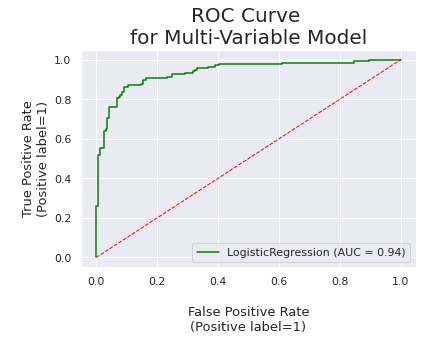

In [ ]:
# generate the receiver-operating curve for multi-var model
metrics.plot_roc_curve(clf_allVars, x_post, target_binarized_chol,color='green')  
plt.title('ROC Curve \nfor Multi-Variable Model',fontsize=20)
plt.xlabel('\nFalse Positive Rate\n(Positive label=1)',fontsize=13)  
plt.ylabel('\nTrue Positive Rate\n(Positive label=1)',fontsize=13)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='red', label='Random')
plt.show()


In [ ]:
# manually calculate sensitivity & specificity (all-vars model)

true_y_list=[] #hold the true 0 or 1
pred_y_list=[] #hold the predicted 0 or 1

true_positives=0
false_positives=0
false_negatives=0
true_negatives=0

y_predictions_allfactor=y_predictions_allfactor.reshape(-1,1)


for i in y_vals:
  if i==0:
    true_y_list.append(0)
  else:
    true_y_list.append(1)

for i in y_predictions_allfactor:
  if i==0:
    pred_y_list.append(0)
  else:
    pred_y_list.append(1)

for index in range(len(pred_y_list)):
  if true_y_list[index]==1 and pred_y_list[index]==1:
    # true positive (both true and predicted are 1)
    true_positives +=1
  elif true_y_list[index]==0 and pred_y_list[index]==1:
    # false positive (true is 0 but pred is 1)
    false_positives +=1
  elif true_y_list[index]==1 and pred_y_list[index]==0:
    # false negative (true is 1 but pred is 0)
    false_negatives +=1
  elif true_y_list[index]==0 and pred_y_list[index]==0:
    # true negative (both true and pred are 0)
    true_negatives +=1

print("total values:",len(true_y_list),'\n')
print('true positives:',true_positives)
print('false positives:',false_positives)
print('false negatives:',false_negatives)
print('true negatives:',true_negatives)


total values: 303 

true positives: 116
false positives: 15
false negatives: 23
true negatives: 149


##Dataset Descriptions (for slides)


In [ ]:
# Heart Disease (0 vs. 1-4)
heart_disease=df['Target']
zero_count=0
one_count=0

for i in  heart_disease:
  if i=='?':
    pass
  elif i==0:
   zero_count +=1
  else:
    one_count +=1

print("Patients with no disease:",zero_count)
print("Patients with heart disease:",one_count)

Patients with no disease: 164
Patients with heart disease: 139


In [ ]:
# Age (over 65 vs. 65 and under)

age=df['Age']
over_count=0
under_count=0

for i in age:
  if i=='?':
    pass
  elif i>65:
   over_count +=1
  else:
    under_count +=1

print("Patients over 65:",over_count)
print("Patients 65 and under:",under_count)
print("_______________________________\n")
print(age.describe())

Patients over 65: 33
Patients 65 and under: 270
_______________________________

count    303.000000
mean      54.438944
std        9.038662
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64


In [ ]:
# Chest Pain (1 vs. 2-4)
# kaggle says: chest pain type?? no idea what it mean

chestPain=df['Chest_Pain']
no_pain=0
yes_pain=0

for i in chestPain:
  if i=='?':
    pass
  elif i==1:
   no_pain +=1
  else:
    yes_pain +=1

print("Patients with no chest pain:",no_pain)
print("Patients with chest pain:",yes_pain)
print("_______________________________\n")
print(chestPain.describe())


Patients with no chest pain: 23
Patients with chest pain: 280
_______________________________

count    303.000000
mean       3.158416
std        0.960126
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Chest_Pain, dtype: float64


In [ ]:
# Gender (male (1) vs. female (0) )
# ^^ Kaggle says that male is 1, female is 0
gender=df['Sex']
female=0
male=0

for i in gender:
  if i=='?':
    pass
  elif i==0:
   female +=1
  else:
    male +=1

print("Females:",female)
print("Males:",male)
print("_______________________________\n")
print(gender.describe())

Females: 97
Males: 206
_______________________________

count    303.000000
mean       0.679868
std        0.467299
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64


In [ ]:
# Fasting blood sugar
# ^^ Kaggle says: fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false)
# I think this means 1="over 120", 0="under 120" ???? (talk with Felipe/Wenqi)

fbs=df['Fasting_Blood_Sugar']
fbs_zero=0
fbs_one=0

for i in fbs:
  if i=='?':
    pass
  elif i==0:
    fbs_zero +=1
  else:
    fbs_one +=1

print('Fasting blood sugar (0): ',fbs_zero)
print('Fasting blood sugar (1): ',fbs_one)
print("_______________________________\n")
print(fbs.describe())

Fasting blood sugar (0):  258
Fasting blood sugar (1):  45
_______________________________

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Fasting_Blood_Sugar, dtype: float64


##Section for All Meeting Notes

In [ ]:
# 7/16 Friday notes

"""
-calculate accuracy & f1-score seperately (manually)
-generate Receiver operating curve for cholesterol results
-add some slides about this heart Disease project to our current presentation (7/27)
-make my own diagram of this (confusion matrix): https://www.researchgate.net/publication/340034692/figure/fig1/AS:870930318385152@1584657377357/Confusion-matrix-and-performance-equations-The-confusion-matrix-included-four.png
-have our own data for confusion matrix (do manually)

-calculate manually: sensitivity (true positive rate) & specificity (true negative rate)
- on paper: write the 4 equations --> substitute in the numbers --> calculate sensitivity (true positive rate) & specificity (true negative rate)
- put that on a slide
- do long division manually

-start incorporating more factors into the model
- see how the models performance changes

* Hypothesis: more features --> higher performance
"""


'\n-calculate accuracy & f1-score seperately (manually)\n-generate Receiver operating curve for cholesterol results\n-add some slides about this heart Disease project to our current presentation (7/27)\n-make my own diagram of this (confusion matrix): https://www.researchgate.net/publication/340034692/figure/fig1/AS:870930318385152@1584657377357/Confusion-matrix-and-performance-equations-The-confusion-matrix-included-four.png\n-have our own data for confusion matrix (do manually)\n\n-calculate manually: sensitivity (true positive rate) & specificity (true negative rate)\n- on paper: write the 4 equations --> substitute in the numbers --> calculate sensitivity (true positive rate) & specificity (true negative rate)\n- put that on a slide\n- do long division manually\n\n-start incorporating more factors into the model\n- see how the models performance changes\n\n* Hypothesis: more features --> higher performance\n'

In [ ]:
# how to email Dr. Wang
# MIBLab: [NAME-Highschool] Lab meeting absense

In [ ]:
# 7/19 notes

"""
1) meet with Ryan & Collin sometime
2) write the long divisions on clean paper, put as %
3) for the Heart Disease slides: figure out who going to do what
4) for "results" slide: ROC curve, Sensitivity & Specificity calculations
  - in ROC plot, plot a diagonal line centered at Origin (area under curve = 0.54)

5) calculate f1-score & accuracy by hand

6) next Step: start incorporating more factors into the model
    - see how the models performance changes
7) start practicing to present our slides (presenting on 7/27)

-Ryan is attending campus visits/soccer stuff this week

"""

'\n1) meet with Ryan & Collin sometime\n2) write the long divisions on clean paper, put as %\n3) for the Heart Disease slides: figure out who going to do what\n4) for "results" slide: ROC curve, Sensitivity & Specificity calculations\n  - in ROC plot, plot a diagonal line centered at Origin (area under curve = 0.54)\n\n5) calculate f1-score & accuracy by hand\n\n6) next Step: start incorporating more factors into the model\n    - see how the models performance changes\n7) start practicing to present our slides (presenting on 7/27)\n\n-Ryan is attending campus visits/soccer stuff this week\n\n'

In [ ]:
# 7/21 notes

"""
- fix up slides
- start preparing to present
- convention is ~1 minute per slide
- next Wednesday we will go through it all

"""

'\n- fix up slides\n- start preparing to present\n- convention is ~1 minute per slide\n- next Wednesday we will go through it all\n\n'

In [ ]:
# 7/23 notes

"""
- fix up slides (Collin & Ryan)
- ask Ryan about his availability for next week
- Dry run on Wednesday
"""

In [ ]:
# 7/26 notes

"""
- Presentation dry-run on Wednesday 7/28
- let Collin know to do brief summary of Feature Engineering
- let Ryan catch up on our progress to understand the project
"""

In [ ]:
# 7/28 notes
"""
- for each graph/figure: [null] hypothesis, approach, result


"""

In [ ]:
# 7/30 notes
"""
-Ryan: get more familiar with his material
-Ryan: let me know when to continue by saying "next" or something
-Ryan: try not to directly read the slide content; add your own details/explanations
-Collin: make changes for some of your slides
-Everyone: familiarize our parts, practice ourselves
-Everyone: introduce ourselves in the beginning of project 

-Larry & Collin: at the "Discussion" slide, restate problem statement & results
-Collin change your Discussion slide for your side project

-Everyone: meet this weekend or Monday to dry-run ourselves
"""

In [ ]:
# 8/3 notes

"""
-all: let Larry know when to go to next slide
-Collin & Larry: coordinate slide 26

-skip Wednesday meeting (8/4)
-meet Friday? ask collin if he can come Fridays
"""

In [ ]:
# Collin can come on Tuesdays, Wednesdays, Thursdays